In [6]:
import pandas as pd
import json

# Load JSONL file (one JSON object per line)
with open("../data/MAFALDA_user_study_examples_with_labels.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df.head()


,text,labels,sentences_with_labels
0,"TITLE: Gatineau police officer tests positive,...","[[232, 332, slippery slope]]","{""TITLE: Gatineau police officer tests positiv..."
1,"Bill, you drive a beat-up car from the 1980s. ...","[[0, 126, ad hominem]]","{""Bill, you drive a beat-up car from the 1980s..."
2,"""Four out of five dentists recommend Happy Glo...","[[0, 91, appeal to (false) authority]]","{""\""Four out of five dentists recommend Happy ..."
3,TITLE: What makes a people think they're smart...,[],"{""TITLE: What makes a people think they're sma..."
4,TITLE: Sound familiar? POST: ok but can I just...,[],"{""TITLE: Sound familiar?"": [[""nothing""]], ""POS..."


In [16]:
df.shape

(20, 4)

In [7]:
def extract_label_names(label_list):
    return [label[-1] for label in label_list if isinstance(label, list) and len(label) > 0]

df["fallacy_list"] = df["labels"].apply(extract_label_names)
df["fallacy_list"].head()


0                 [slippery slope]
1                     [ad hominem]
2    [appeal to (false) authority]
3                               []
4                               []
Name: fallacy_list, dtype: object

In [8]:
fallacy_exploded = df.explode("fallacy_list")
fallacy_counts = fallacy_exploded["fallacy_list"].value_counts()
fallacy_counts


fallacy_list
Appeal to Ridicule             5
ad hominem                     4
hasty generalization           3
straw man                      3
false dilemma                  2
false causality                2
appeal to tradition            2
causal oversimplification      2
slippery slope                 1
appeal to (false) authority    1
guilt by association           1
ad populum                     1
appeal to worse problems       1
circular reasoning             1
nothing                        1
equivocation                   1
Name: count, dtype: int64

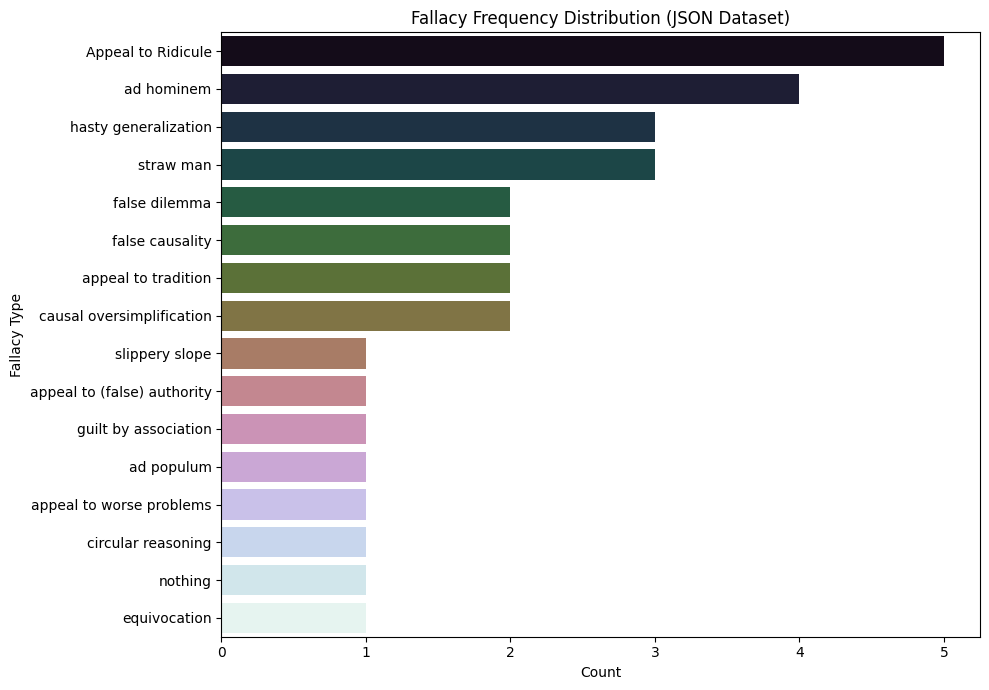

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.barplot(x=fallacy_counts.values, y=fallacy_counts.index, palette="cubehelix")

plt.title("Fallacy Frequency Distribution (JSON Dataset)")
plt.xlabel("Count")
plt.ylabel("Fallacy Type")
plt.tight_layout()
plt.show()


In [24]:
with open("../data/MAFALDA_non_annotated_dataset.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

df2 = pd.DataFrame(data)
df2.head()

,text,labels
0,"Now, you didn't hear any plan from the preside...",[]
1,You've got about a million right here in Arizo...,[]
2,You're cutting back on maintenance and equipme...,[]
3,CARTER: As long as there is a Democratic Presi...,[]
4,And they want an American foreign policy that ...,[]


In [25]:
df2.shape

(9545, 2)

In [22]:
df2.sample(2)["text"].values

array(['TITLE: TIL that 82 percent of avocado oil sold in the United States is either rancid or mixed with other oils. While it is a great source of vitamins and minerals when fresh and pure, the vast majority of avocado oil in the United States is of extremely poor quality.\nPOST: LPT : Wanna the good benefits from an avocado? Buy an avocado.',
       "TITLE: The closing of supposed healing sites like Lourdes proves that there is no validity to the healing claims\nPOST: I know very, very few Christians (or religious folk in general) who believe in faith healing, or sacred healing sites or junk like that. > the fact that even Christians don't believe Lourdes can heal anything shows that religion is useless when it comes to practicality That's such a weird statement. So you're trying to apply the fact that most Christians don't believe in (what you admit is) a false premise as a way to checkmate their faith??? How does that make any sense??"],
      dtype=object)

In [18]:


with open("../data/MAFALDA_gold_standard_dataset.jsonl", "r") as f:
    data = [json.loads(line) for line in f]

df3 = pd.DataFrame(data)
df3.head()


,text,labels,comments,sentences_with_labels
0,TITLE: Endless Ledge Skip Campaign for Alts PO...,"[[155, 588, slippery slope]]","[Slippery slope: P1 = poster, A = why not just...","{""TITLE: Endless Ledge Skip Campaign for Alts ..."
1,"Two of my best friends are really introverted,...","[[84, 145, hasty generalization]]","[Based on two people only, you can't draw gene...","{""Two of my best friends are really introverte..."
2,TITLE: There is a difference between a'smurf' ...,"[[118, 265, false analogy]]","[False Analogy: X: Having an alt , Y: smurfing...","{""TITLE: There is a difference between a'smurf..."
3,TITLE: Discussion Thread (Part 3): 2020 Presid...,"[[107, 261, guilt by association], [107, 338, ...",[Circular reasoning: X = The status quo in Ame...,"{""TITLE: Discussion Thread (Part 3): 2020 Pres..."
4,"America is the best place to live, because it'...","[[0, 78, circular reasoning]]",[Circular reasoning: X=America is the best pla...,"{""America is the best place to live, because i..."


We’ve got:

text: The source content

labels: List of span positions + fallacy names

comments: Annotator reasoning **particularly important**

sentences_with_labels: JSON-style sentence annotations



In [20]:
df3.shape

(200, 4)

In [23]:
def extract_label_names(label_list):
    return [label[-1] for label in label_list if isinstance(label, list) and len(label) > 0]

df3["fallacy_list"] = df3["labels"].apply(extract_label_names)
df3["fallacy_list"].head()


0                                     [slippery slope]
1                               [hasty generalization]
2                                      [false analogy]
3    [guilt by association, causal oversimplificati...
4                                 [circular reasoning]
Name: fallacy_list, dtype: object



## **Why This Dataset Rocks according to ChatGPT:**

🔥 1. High-quality labeled examples
These 200 entries can be:

A validation set for your models

A training seed for few-shot / rule-based / LLM evaluation

A benchmark for comparing annotator vs. model reasoning

🧠 2. Annotator comments = explainability gold
You could:

Use them to train an explanation generator

Display them alongside predictions for user trust

Study which fallacies have most/least agreement or reasoning depth

🧪 3. Super detailed sentence-level labeling
You can:

Train a sentence-level classifier (vs full-text)

Highlight fallacy spans in your UI

Combine this with labels for token-level analysis if you want to go granular

